<a href="https://colab.research.google.com/github/Rafael-Muthemba/IndProject1/blob/main/IProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding


Since there is a lack of direction from Microsoft, I shall help in explaining why they should venture into this business. Does movie-making make money? Yes, more movies making money than those losing money. 
I shall check the type of movie that makes more money, What's the genre, duration(how long), budget, studio, director and writer, actor. experience, etc.


Microsoft definitely has plenty of money to jump in on the big budget movies immediately, but without knowing the quality of their other investment opportunities and given they have an existing brand that is very valuable, I want to present a balanced approach that considers ROI, total profit, and also "quality".

ROI is important to decide which movie making ventures make sense to fund vs. using the money in other Microsoft projects.
Total profit is important in understanding the total amount of money that can be made making movies.
Vote average may be important to Microsoft's brand, depending on how clearly the movie studio is associated with the parent company. Being associated with cheap or low quality things may damage Microsoft overall, even if the movies make them more money.



##Data Understanding


In [15]:
#Importing all libraries required for the project 
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [16]:
#Loading the data from the Drive
bom_movie_details = pd.read_csv('bom.movie_gross.csv')


In [17]:
#Displaying the first 5 rows of the data
bom_movie_details.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
#Displaying details of the last five rows of the data
bom_movie_details.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [19]:
#Get info on the data
bom_movie_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the information above, we find that we have a dataframe with 5 columns and different data types

In [20]:
# Show the summary statistics of the data
bom_movie_details.describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Based on this we find the central tendency of this dataset, foreign gross was not added to the statistics since it is an object datatype. 

In [21]:
# Establishing connection to the sql database and checking the available tables
conn = sqlite3.connect('im.db 2')
pd.read_sql("""
SELECT name
FROM sqlite_master 
WHERE type = 'table';
""",conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


We have now connected to the sql database storing imdb data 


In [22]:
#previewing the first five five rows of the dataset
im_movie_basics = pd.read_sql("""
                              SELECT*
                              FROM movie_basics;
                              """,conn)
im_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


From this we find that we have the movie title which has been given a specific genre(s)

In [23]:
#Get info on the data
im_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [24]:
# Show the summary statistics of the data
im_movie_basics.describe()


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


A brief overview of the central tendency of the runtime of a movie and year of release

In [25]:
#connecting to the sql database with imdb ratings and reading the first 5 rows
im_movie_ratings = pd.read_sql("""
                              SELECT*
                              FROM movie_ratings;
                              """,conn)
im_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


So there is a movie ID associated to certain ratings in average and the number of votes for every movie

In [26]:
#Get info on the data
im_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [27]:
# Show the summary statistics of the data
im_movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Central tendency of the average rating(ironic), and number of votes

In [28]:
#Displaying data details of the first five rows
movie_budgets= pd.read_csv("tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
#Displaying details of the last five rows of the data
movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [30]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Realize that production budget, domestic gross and worldwide gross are strings

In [31]:
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### **Data Preparation**

In [32]:
#Data preparation, turn movie budgets data to int
movie_budgets['production_budget']= movie_budgets['production_budget'].str.replace("$",'')
movie_budgets['domestic_gross']= movie_budgets['domestic_gross'].str.replace("$",'')
movie_budgets['worldwide_gross']= movie_budgets['worldwide_gross'].str.replace("$",'')

movie_budgets['production_budget']=movie_budgets['production_budget'].str.replace(',','')
movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].str.replace(',','')
movie_budgets['worldwide_gross']=movie_budgets['worldwide_gross'].str.replace(',','')
movie_budgets.head()


<ipython-input-32-093aa41f55b4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget']= movie_budgets['production_budget'].str.replace("$",'')
<ipython-input-32-093aa41f55b4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross']= movie_budgets['domestic_gross'].str.replace("$",'')
<ipython-input-32-093aa41f55b4>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['worldwide_gross']= movie_budgets['worldwide_gross'].str.replace("$",'')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


$ sign removed from the values to avoid confusion

In [33]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [34]:
#Converting the strings into intergers
movie_budgets['production_budget']=movie_budgets['production_budget'].astype(int)
movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].astype(int)
movie_budgets['id']=movie_budgets['id'].astype(str)
movie_budgets['worldwide_gross']=movie_budgets['worldwide_gross'].astype(np.int64)

In [35]:
#check if values have been converted to int
#chack if ID has been converted to str  
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   object
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


All the data in numerical columns have been converted to int. The cell below had already been run so you can notice the new columns. 

In [36]:
#Calculating and forming the columns for total_gross,net_return,return_on_investment
movie_budgets['total_gross']=movie_budgets['domestic_gross']+movie_budgets['worldwide_gross']
movie_budgets['net_return']=movie_budgets['total_gross']-movie_budgets['production_budget']
movie_budgets['return_on_investment']=movie_budgets['net_return']/movie_budgets['production_budget']*100

Bringing logic so that we can be able to derive insights from this data

In [37]:
# checking for null values
bom_movie_details.isnull().sum()



title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Quite some null values in foreign and domestic gross. Which we have to drop if we are going to use those columns 

In [38]:
bom_movie_details= bom_movie_details.dropna()
bom_movie_details.shape
bom_movie_details

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [39]:
# checking for unique values
bom_movie_details.nunique()


title             2007
studio             172
domestic_gross    1295
foreign_gross     1193
year                 9
dtype: int64

In [40]:
# checking for null values
movie_budgets.isnull().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
total_gross             0
net_return              0
return_on_investment    0
dtype: int64

No null values in any column, nice 

In [41]:
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_return,return_on_investment
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.224389
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,511.010451
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445,877.115505
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.983227
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,1272840850,972840850,324.280283
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,194.989835
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,1079695098,779695098,259.898366


We can see there are movies that made more than 100% profit and some made losses 

In [42]:
bom_movie_details.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [43]:
# checking for unique values
movie_budgets.nunique()


id                       100
release_date            2418
movie                   5698
production_budget        509
domestic_gross          5164
worldwide_gross         5356
total_gross             5363
net_return              5497
return_on_investment    5402
dtype: int64

In [44]:
#checking for duplicates
len(movie_budgets[movie_budgets.duplicated()])

0

No duplicates, nice

In [45]:
#Check for null values in imdb movie ratings
im_movie_ratings.isnull().sum()



movie_id         0
averagerating    0
numvotes         0
dtype: int64

No null values in any column, nice

In [46]:
#Checking for number of unique values in every column
im_movie_ratings.nunique()

movie_id         73856
averagerating       91
numvotes          7349
dtype: int64

In [47]:
im_movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

We can see there are numerous null values in column for runtime and genre. So we shall drop all null values and have a credible sample

In [48]:
im_movie_basics= im_movie_basics.dropna()
im_movie_basics.shape
im_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [49]:
im_movie_basics.nunique()

movie_id           112232
primary_title      105478
original_title     106905
start_year             13
runtime_minutes       361
genres               1040
dtype: int64

### **Data Analysis and Visualization** 

---



Now we can start analysis of the data we have 

In [50]:
#Checking for the total number of movies per genre 
genre_analysis= im_movie_basics['genres'].value_counts().head(10)
genre_analysis

Documentary              24672
Drama                    15725
Comedy                    6413
Comedy,Drama              3163
Horror                    2975
Biography,Documentary     2052
Thriller                  1924
Drama,Romance             1806
Documentary,Drama         1515
Comedy,Drama,Romance      1451
Name: genres, dtype: int64

We want to check number of movies per genre

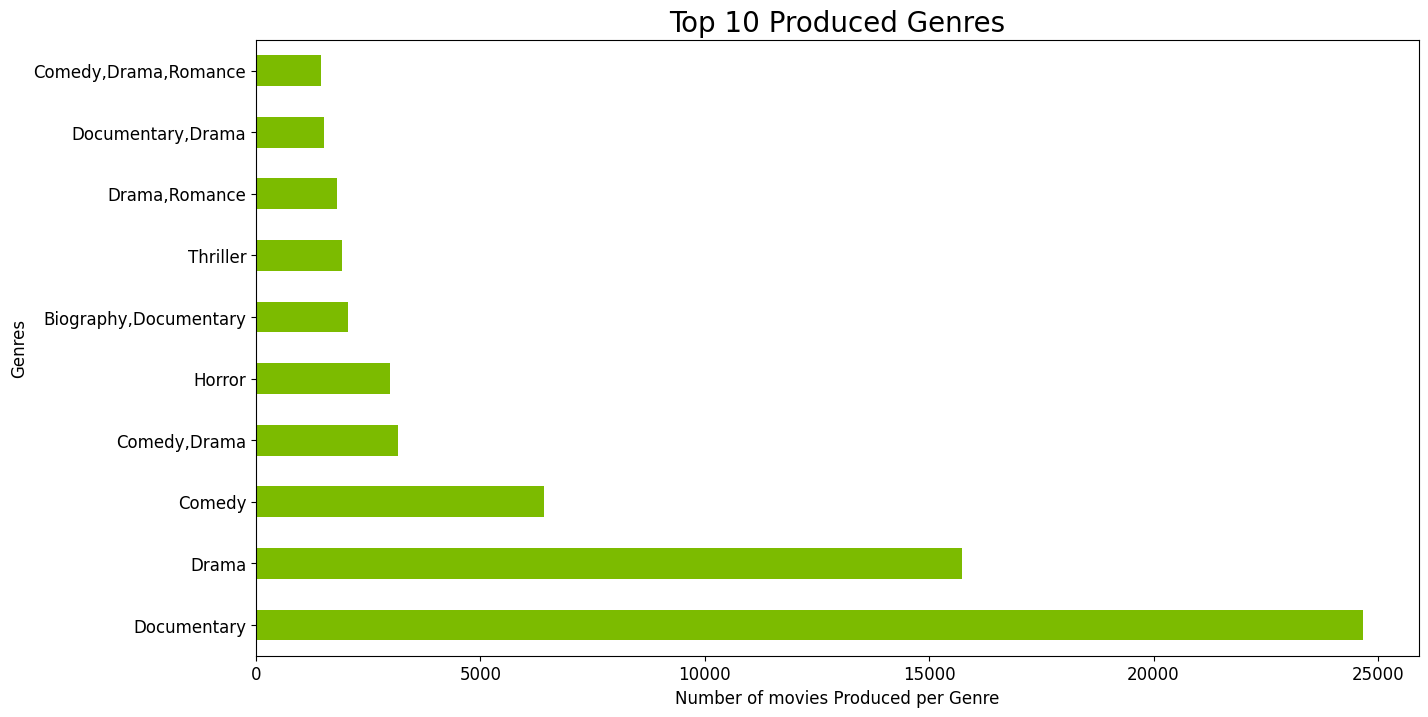

In [51]:
#Creating a bar graph of the top produced movie genres
ax = genre_analysis.plot(kind = 'barh', figsize = (15,8), color = '#7cbb00', fontsize = 12)
ax.set_alpha(0.5)
ax.set_title('Top 10 Produced Genres', fontsize = 20)
ax.set_ylabel('Genres', fontsize = 12)
ax.set_xlabel('Number of movies Produced per Genre', fontsize = 12)
plt.show()

We have plotted a bar graph of genre against number of produced movies. From this we can tell Documentary movies are produced more than any genre, therefore, would be a first pick on types of genres for the Studio. Followed by Drama and comedy. Note that comedy/drama comes after comedy empasizing on the importance of comedy and drama genres 

In [52]:
im_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [53]:
im_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [54]:
#Joining the movie_basic table with the movie_rating table
im_movie_basic_rating =pd.read_sql("""
                                   SELECT *
                                    FROM movie_basics
                                    JOIN movie_ratings
                                    USING (movie_id);
                                    """,conn)
im_movie_basic_rating

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


We have to join the movie basics and movie ratings tables in order to have the column for ratings per genre.

In [55]:
#checking ratings per genre and sorting them in descending order
genre_ratings = im_movie_basic_rating.groupby(['genres'])['averagerating'].mean().sort_values(ascending = False).head()
genre_ratings

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
Name: averagerating, dtype: float64

So we can see that the genres with highest rating are comedy, Documentary and Fantasy

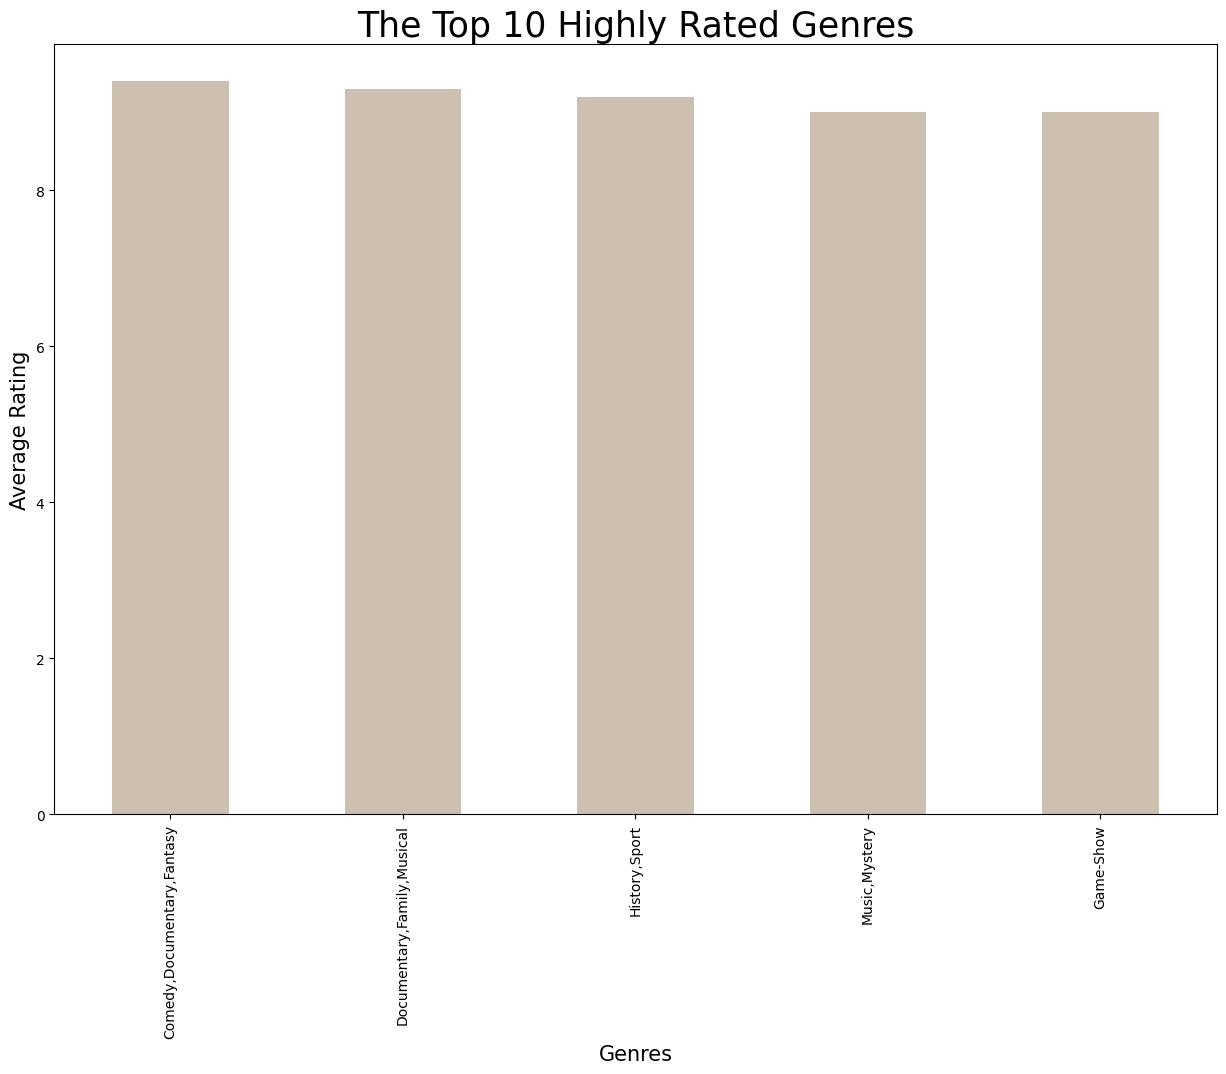

In [56]:
#Creating a graph of the top rated genres
ax = genre_ratings.plot( kind = 'bar', color = '#CDC0B0',figsize = (15,10))
ax.set_title ('The Top 10 Highly Rated Genres', fontsize = 25)
ax.set_ylabel('Average Rating',fontsize = 15)
ax.set_xlabel('Genres', fontsize = 15)
plt.show()

In [57]:
bom_movie_details.isnull().sum()


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [58]:
bom_movie_details.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


We notice that Foreign and domestic gross have different data types which wont work if we used both columns for numerical purposes. We have to change for them to be similar

In [59]:
#Converting the column foreign gross to float datatype
bom_movie_details['foreign_gross'] = bom_movie_details['foreign_gross'].str.replace(',','').astype(float)

In [60]:
#Adding foreign gross and domestic gross to get total gross
bom_movie_details['total_gross'] = bom_movie_details['domestic_gross'] + bom_movie_details['foreign_gross']

In [61]:
bom_movie_details.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [62]:
im_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [63]:
movie_length =im_movie_basics.groupby('genres')['runtime_minutes'].mean().sort_values(ascending = False).head()
movie_length

genres
Drama,Western               225.342105
Biography,Mystery,Sci-Fi    220.000000
History,Musical,Romance     174.000000
Action,Musical,Romance      170.000000
Musical,Romance,Thriller    165.000000
Name: runtime_minutes, dtype: float64

(0.0, 300.0)

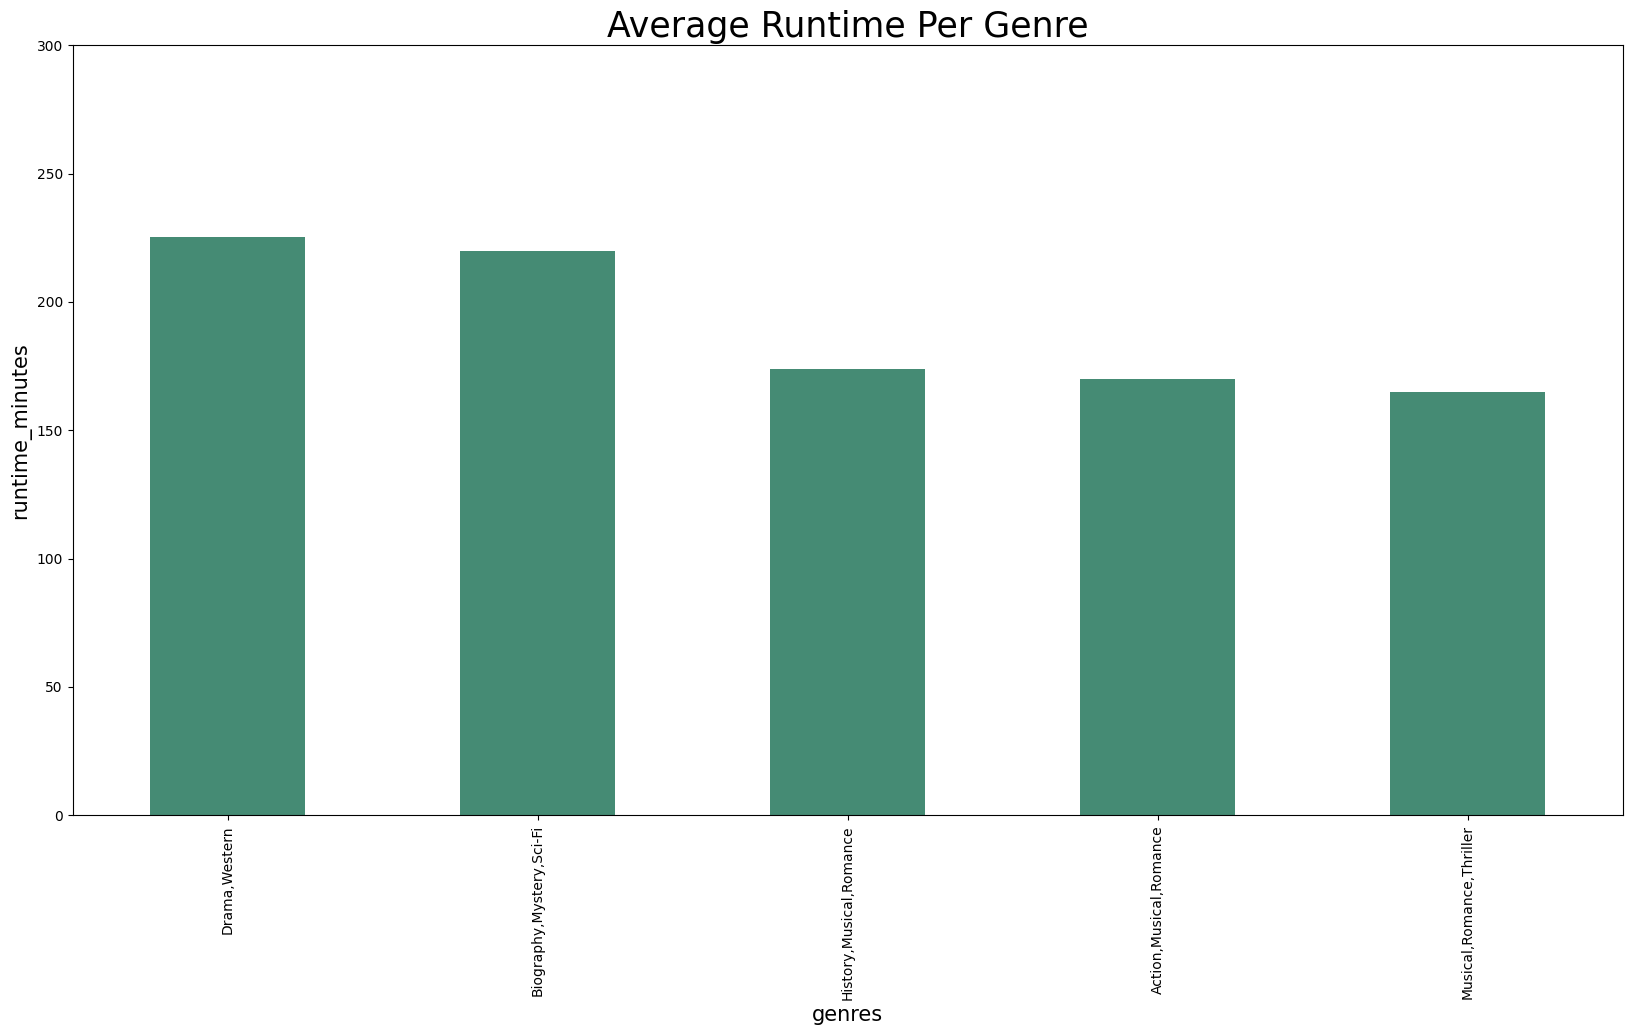

In [75]:
#Creating a bar graph of the average runttime per genre
ax = movie_length.plot(kind = 'bar',figsize = (20,10), color = '#458B74', width = 0.5)
ax.set_title('Average Runtime Per Genre', fontsize = 25)
ax.set_xlabel('genres', fontsize = 15)
ax.set_ylabel('runtime_minutes', fontsize = 15 )
ax.set_ylim((0,300))

In [65]:
#Arranging the data of total gross for every studio in descending order 
studio_gross =bom_movie_details.groupby('studio')['total_gross'].mean().sort_values(ascending = False).head()
studio_gross

studio
HC          8.703000e+08
P/DW        5.076500e+08
BV          4.249075e+08
GrtIndia    2.542000e+08
WB          2.368577e+08
Name: total_gross, dtype: float64

From this we see HC studio had the highest amount of gross earnings followed by P/DW

Text(0, 0.5, 'Total Gross')

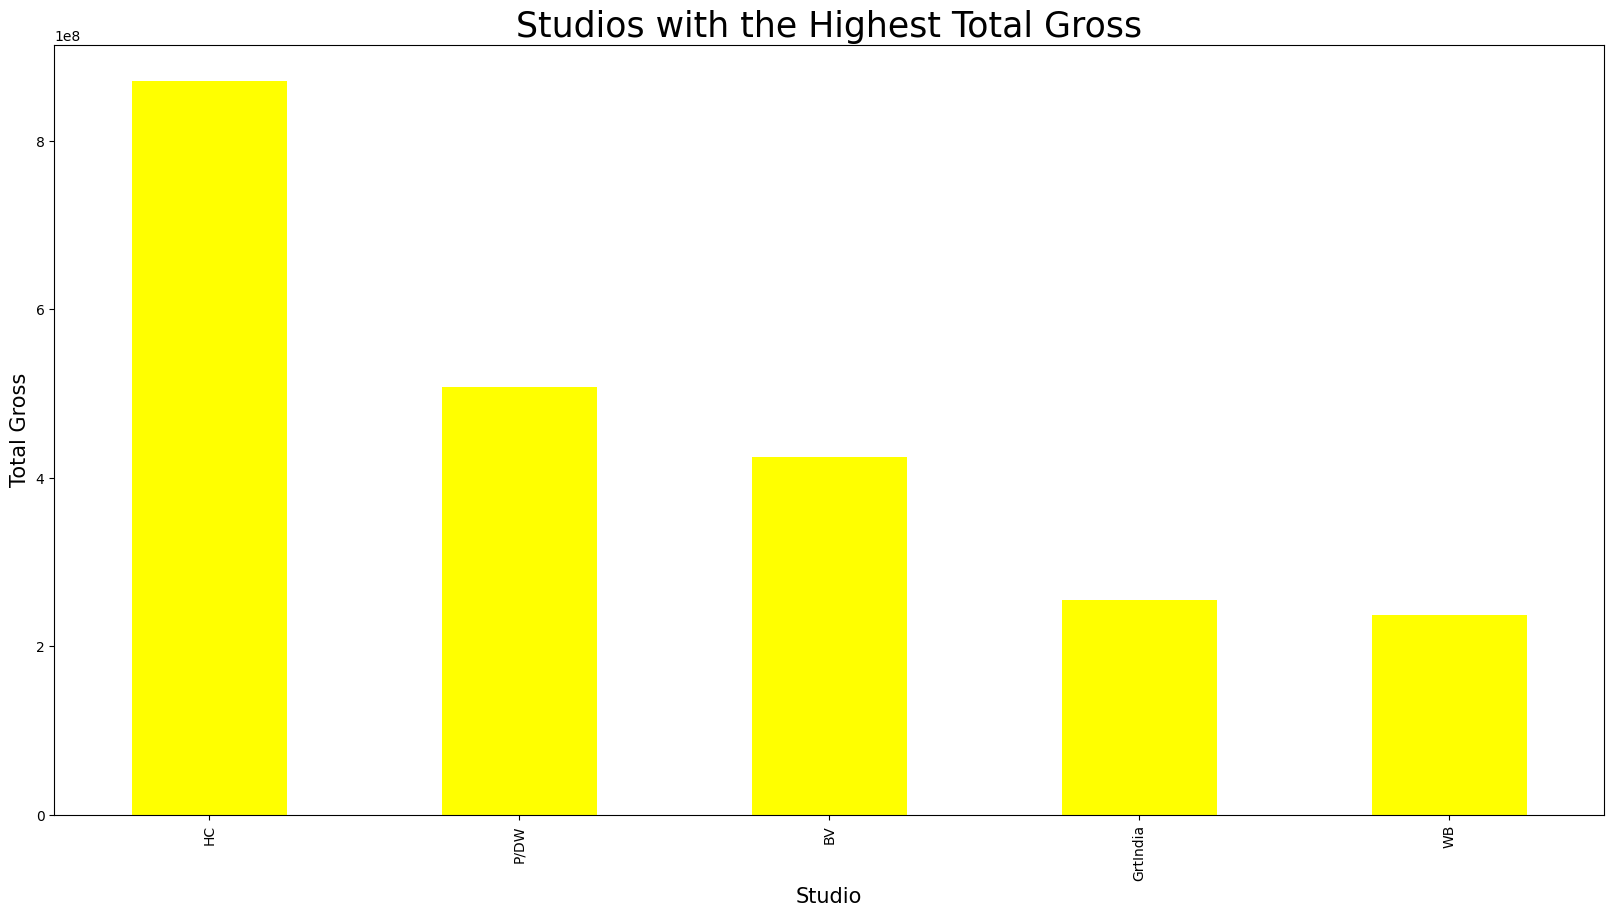

In [76]:
#Creating a bar graph of the studios with highest earnings
ax = studio_gross.plot(kind = 'bar',figsize = (20,10), color = '#FFFF00', width = 0.5)
ax.set_title('Studios with the Highest Total Gross', fontsize = 25)
ax.set_xlabel('Studio', fontsize = 15 )
ax.set_ylabel('Total Gross', fontsize = 15)

Above is a bar graph that represents gross earnings against studios

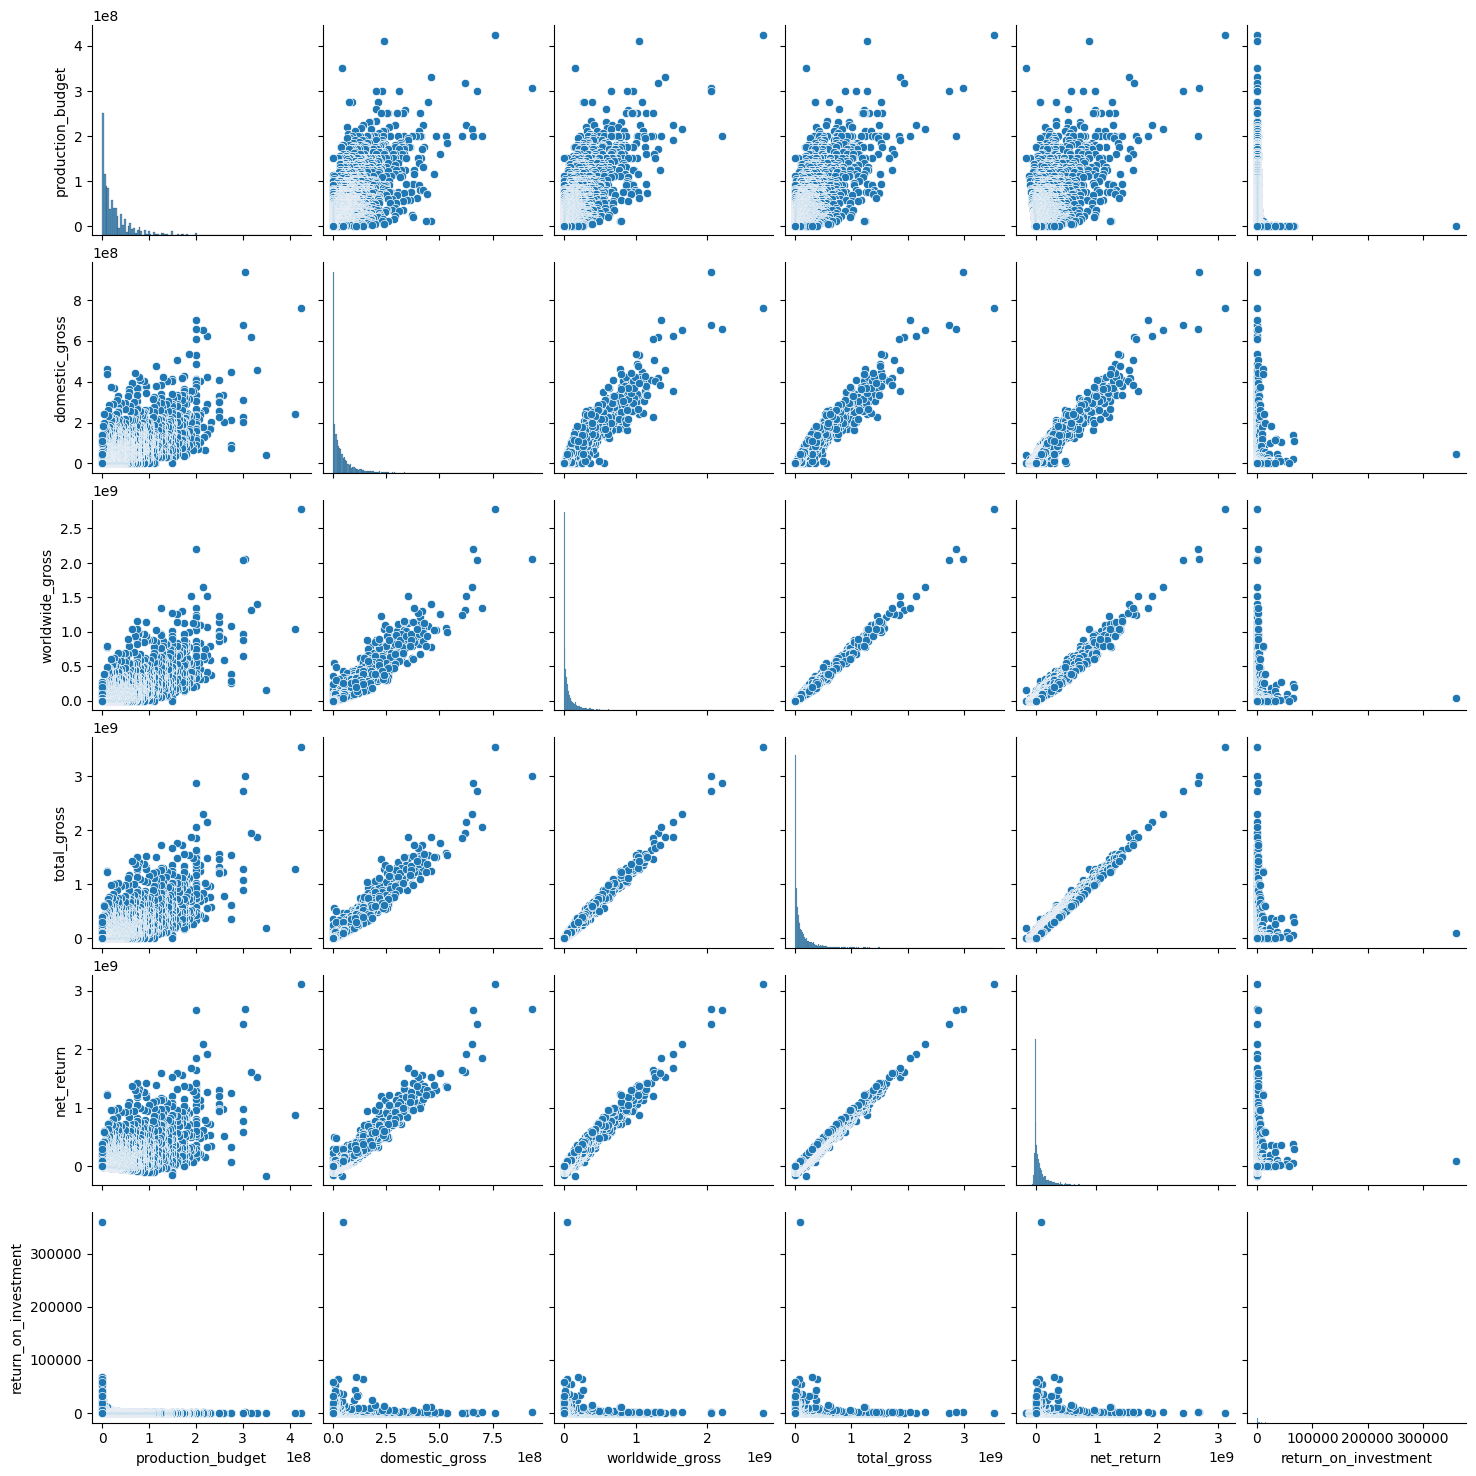

In [67]:
sns.pairplot(movie_budgets)

Production budget has a fairly positive correlation with domestic gross.
This shows as more investment is made to the movie the Domestic gross might increase slightly. Production budget has a fairly positive correlation with worldwide gross.
This shows as more investment is made to the movie the Worldwide gross might increase slightly. Production budget has a weak negative correlation with Return on Investment meaning that the amount of Return on Investment is not affected by by the production budget
